In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
# Testing with random values that can be changed anytime

T = 1  # Time period left to expiry in annualized form
sigma = 0.03
K = 50
r = 0.212862 * 0.01
S = np.linspace(0, 100, 100)

In [ ]:
# Function to plot vanilla, cash-or-nothing and asset-or-nothing call/put options for each model

def plot_digital_vanilla(model, cp_flag, S, K, r, sigma, T=1, beta=1):

    if model == "DDM":
        vanilla = globals()[model + cp_flag](S, K, r, sigma, T, beta)
        asset_or_nothing = globals()[model + "Asset" + cp_flag](S, K, r, sigma, T, beta)
        cash_or_nothing = globals()[model + "Cash" + cp_flag](50, S, K, r, sigma, T, beta)

    else:
        vanilla = globals()[model + cp_flag](S, K, r, sigma, T)
        asset_or_nothing = globals()[model + "Asset" + cp_flag](S, K, r, sigma, T)
        cash_or_nothing = globals()[model + "Cash" + cp_flag](50, S, K, r, sigma, T)

    plt.figure(figsize = (12, 10))
    plt.axvline(K, color='r', linestyle='--')
    plt.axhline(K, color='r', linestyle='--')

    plt.plot(S, vanilla, 'b', label = "{0} Vanilla {1} Option".format(model, cp_flag))
    plt.plot(S, asset_or_nothing, 'g', label = "{0} Asset-or-Nothing {1} Option".format(model, cp_flag))
    plt.plot(S, cash_or_nothing, 'm', label = "{0} Cash-or-Nothing {1} Option".format(model, cp_flag))

    plt.grid(linestyle='--')
    plt.legend()
    plt.xlabel("Stock Price ($)")
    plt.ylabel("Option Price ($)")

The Black-Scholes formula for a **vanilla call option** is given by

$ C(S,K,r,\sigma,T) = S_0 \Phi(d_1) - K e^{-r(T)} \Phi(d_2)$



$d_1 = \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)(T)}{\sigma\sqrt{T}} \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}$

            The formula can be implemented in Python as follows:

In [ ]:
#BlackSchole Vanilla Options
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*(T))*norm.cdf(d2)


def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*(T))*norm.cdf(-d2) - S*norm.cdf(-d1) # changed return S*... to return K*... 


The Black-Scholes formula for a European **cash or nothing call option** is given by

$ C(A,K,T,\sigma,S,r) = e^{-r(T)} A \Phi(d_1 - \sigma\sqrt{T})$

$d_1 = \frac{\log \frac{S_0}{K} + \left(r+\frac{\sigma^2}{2}\right)(T)}{\sigma\sqrt{T}}$


Where:

K = Strike Value

A = Payable amount

t = at time t

T = expiry Date

In [ ]:
#BlackSchole Digital Cash or nothing Options
def BlackScholesCashCall(A, S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*(T)) * A * norm.cdf(d2)




def BlackScholesCashPut(A, S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*(T)) * A * norm.cdf(-d2)


The Black-Scholes formula for a European **asset or nothing call option** is given by

$ C(K,T,\sigma,S,r) = S \Phi(d_1)$
            
$ d_1 = \frac{\log \frac{S_0}{K} + \left(r+\frac{\sigma^2}{2}\right)(T-t)}{\sigma\sqrt{T-t}}$



In [ ]:
#BlackSchole Digital Asset or nothing Options
def BlackScholesAssetCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    return S * norm.cdf(d1)


def BlackScholesAssetPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T)) / (sigma*np.sqrt(T))
    return S * norm.cdf(-d1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


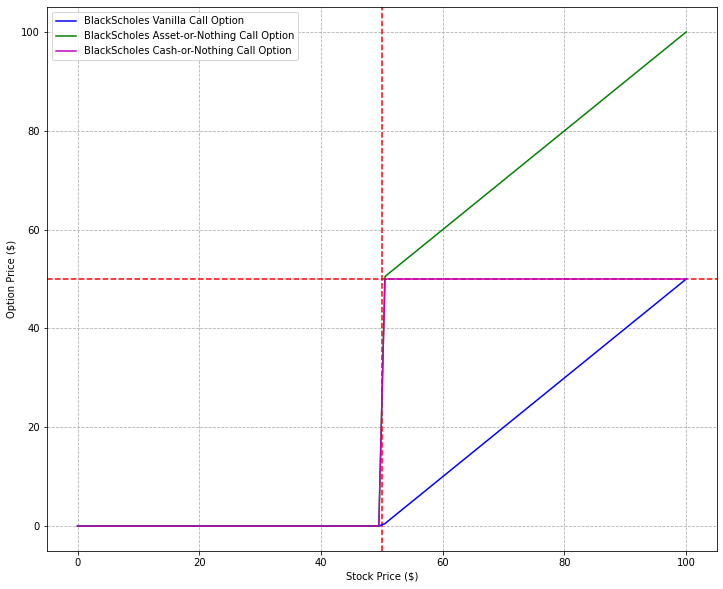

In [ ]:
plot_digital_vanilla("BlackScholes", "Call", S, K, r, sigma, 0.01)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


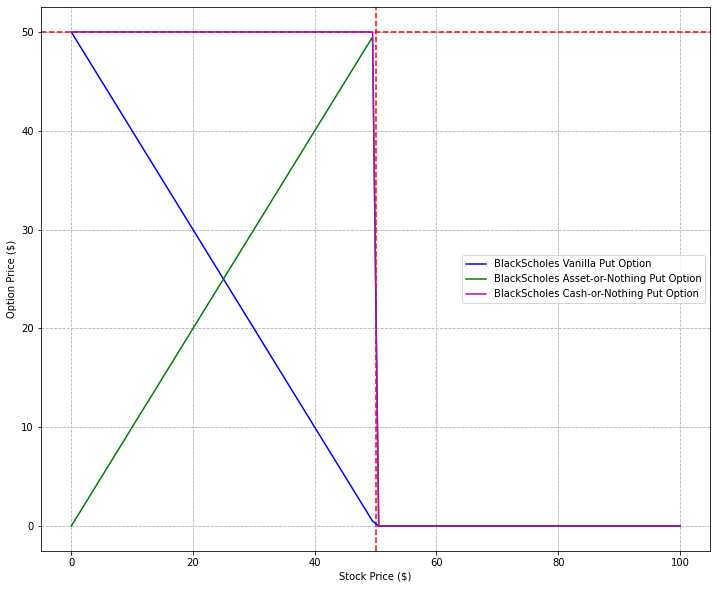

In [ ]:
plot_digital_vanilla("BlackScholes", "Put", S, K, r, sigma, 0.01)

The Bachelier formula for a **vanilla call option** is given by

$ C(S,K,r,\sigma,T) = e^{-r(T)}((S_0 - K)\Phi(\frac{S_0 - K}{\sigma\sqrt{T}}) + \sigma\sqrt{T}\phi(\frac{S_0 - K}{\sigma\sqrt{T}})) $


The formula can be implemented in Python as follows:

In [ ]:
#Bachelier Vanilla Options
def BachelierCall(S, K, r, sigma, T):
    temp = (S - K)/ (sigma *np.sqrt(T))
    return np.exp(-r*(T)) * ((S-K)*norm.cdf(temp) + sigma*np.sqrt(T)*norm.pdf(temp))

def BachelierPut(S, K, r, sigma,T):
    temp = (-S + K)/ (sigma *np.sqrt(T))
    return np.exp(-r*(T)) * ((K - S)*norm.cdf(temp) + sigma*np.sqrt(T)*norm.pdf(temp))

The Bachelier formula for a **Digital cash or nothing  call option** is given by

$ C(A,S,K,r,\sigma,T) = e^{-r(T)}((A)\Phi(\frac{S_0 - K}{\sigma\sqrt{T}})) $

The formula can be implemented in Python as follows:

In [ ]:
#Bachelier Digital cash or nothing Options
def BachelierCashCall(A,S, K, r, sigma, T):
    temp = (S - K)/ (sigma *np.sqrt(T))
    return np.exp(-r*(T)) * (A) *norm.cdf(temp) 

def BachelierCashPut(A, S, K, r, sigma, T):
    temp = (-S + K)/ (sigma *np.sqrt(T))
    return np.exp(-r*(T)) * (A)*norm.cdf(temp) 

The Bachelier formula for a **Digital Asset or nothing  call option** is given by

$ C(S,K,r,\sigma,T) = e^{-r(T)}((S_0)\Phi(\frac{S_0 - K}{\sigma\sqrt{T}}) + \sigma\sqrt{T}\phi(\frac{S_0 - K}{\sigma\sqrt{T}})) $

The formula can be implemented in Python as follows:

In [ ]:
#Bachelier Digital asset or nothing Options
def BachelierAssetCall(S, K, r, sigma, T):
    temp = (S - K)/ (sigma *np.sqrt(T))
    return (S)*norm.cdf(temp) + sigma*np.sqrt(T)*norm.pdf(temp)

def BachelierAssetPut(S, K, r, sigma, T):
    temp = (-S + K)/ (sigma *np.sqrt(T))
    return (S)*norm.cdf(temp) + sigma*np.sqrt(T)*norm.pdf(temp)

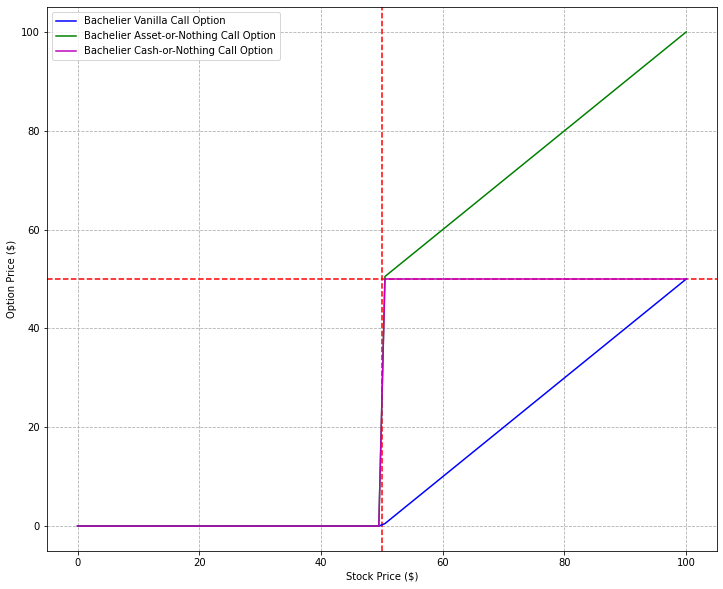

In [ ]:
plot_digital_vanilla("Bachelier", "Call", S, K, r, sigma, 0.01)

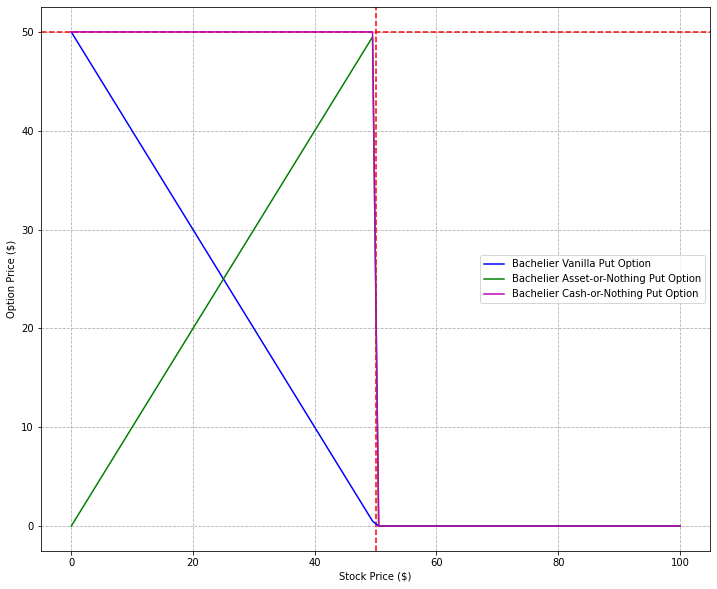

In [ ]:
plot_digital_vanilla("Bachelier", "Put", S, K, r, sigma, 0.01)

The Black76 formula for a `vanilla call option` is given by

$C(F,K,\sigma,T,r) = D(0,T)[F_0 \Phi(d_1) - K\Phi(d_2)]$

$D(0,T) = e^{-rT}$

$d_1 = \frac{\log \frac{F_0}{K} + \left(\frac{1}{2}\sigma^2\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}$

Similarly, the Black76 formula for a `vanilla put option` is given by

$P(F,K,\sigma,T,r) =  D(0,T) [K\Phi(-d_2) - F_0 \Phi(-d_1)]$

In [ ]:
# Black76 vanilla call and put options
# Discount Factor: D(0,T) = np.exp(-r*T)

def Black76Call(F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(d1_Black76) - K*norm.cdf(d2_Black76)) 

def Black76Put(F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(K*norm.cdf(-d2_Black76) - F*norm.cdf(-d1_Black76))

The Black76 formula for a `digital cash-or-nothing call option` is given by

$C(A, F,K,\sigma,T,r) = D(0,T) [A\Phi(d_2)]$

$D(0,T) = e^{-rT}$

$d_1 = \frac{\log \frac{F_0}{K} + \left(\frac{1}{2}\sigma^2\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}$

Similarly, the Black76 formula for a `digital cash-or-nothing put option` is given by

$
P(A, F,K,\sigma,T,r) =  D(0,T) [A\Phi(-d_2)]
$

In [ ]:
#Black76 digital cash-or-nothing call and put options
def Black76CashCall(A, F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(A*norm.cdf(d2_Black76)) 

def Black76CashPut(A, F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(A*norm.cdf(-d2_Black76))

The Black76 formula for a `digital asset-or-nothing call option` is given by

$C(F,K,\sigma,T,r) = D(0,T) [F_0 \Phi(d_1)]$

$D(0,T) = e^{-rT}$

$d_1 = \frac{\log \frac{F_0}{K} + \left(\frac{1}{2}\sigma^2\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}$

Similarly, the Black76 formula for a `digital asset-or-nothing put option` is given by

$P(F,K,\sigma,T,r) =  D(0,T) [F_0 \Phi(-d_1)]$

In [ ]:
#Black76 digital asset-or-nothing call and put options

def Black76AssetCall(F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(d1_Black76)) 

def Black76AssetPut(F, K, r, sigma, T):
    d1_Black76 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2_Black76 = d1_Black76 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(-d1_Black76))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


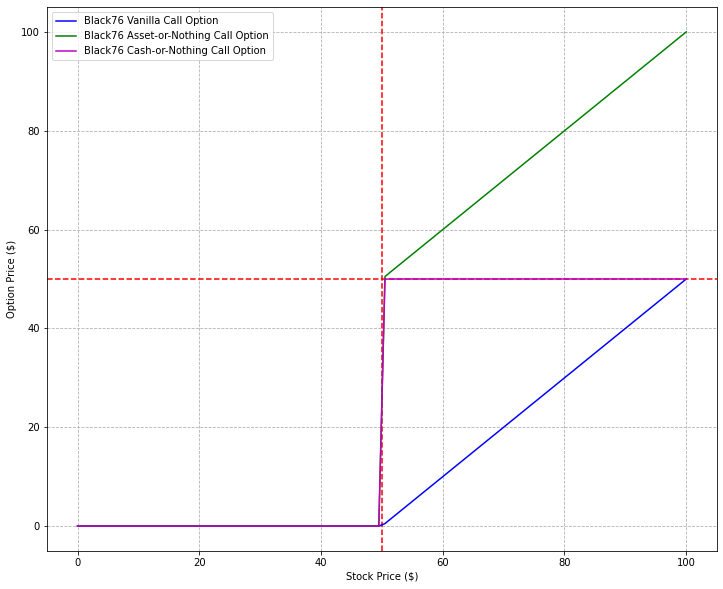

In [ ]:
plot_digital_vanilla("Black76", "Call", S, K, r, sigma, 0.01)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


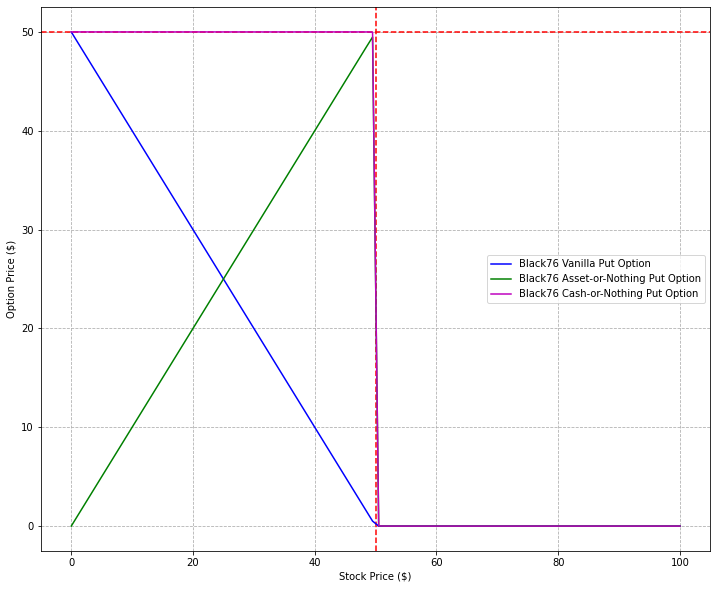

In [ ]:
plot_digital_vanilla("Black76", "Put", S, K, r, sigma, 0.01)

The Displaced Diffusion Model formula for a `vanilla call option` is given by

$C(F,K,\sigma,T,\beta, r) = D(0,T) \left[ \left(\frac{F_0}{\beta}\right) \Phi(d_1) - \left(K + \frac{1-\beta}{\beta}F_0\right) \Phi(d_2) \right]$

$D(0,T) = e^{-rT}$

$d_1 = \frac{\log \frac{F_0/\beta}{K+\frac{1-\beta}{\beta}F_0} + \left(\frac{1}{2}\beta^2\sigma^2\right)T}{\beta\sigma\sqrt{T}} , \hspace{2cm} d_2 = d_1 - \beta\sigma\sqrt{T}$

Similarly, the DDM formula for a `vanilla put option` is given by

$P(F,K,\sigma,T,\beta, r) =  D(0,T) \left[ \left(K + \frac{1-\beta}{\beta}F_0\right)\Phi(-d_2) - \frac{F_0}{\beta} \Phi(-d_1) \right]$

In [ ]:
#DDM vanilla call and put options

def DDMCall(F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((F/beta)*norm.cdf(d1_DDM) - (K+((1-beta)/beta)*F)*norm.cdf(d2_DDM))

def DDMPut(F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((K+((1-beta)/beta)*F)*norm.cdf(-d2_DDM) - (F/beta)*norm.cdf(-d1_DDM))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Text(0, 0.5, 'Option Price ($)')

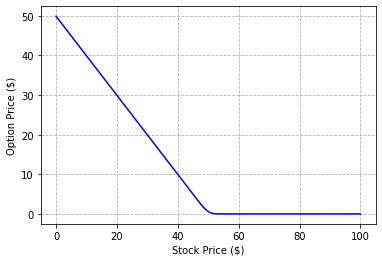

In [ ]:
# setting beta = 1

vanilla = DDMPut(S, K, r, sigma, T, 1)

plt.plot(S, vanilla, 'b')
plt.grid(linestyle='--')
plt.xlabel("Stock Price ($)")
plt.ylabel("Option Price ($)")

The Displaced Diffusion Model formula for a `digital cash-or-nothing call option` is given by

$C(A, F,K,\sigma,T,\beta, r) = D(0,T) \left[\left(A + \frac{1-\beta}{\beta}F_0\right) \Phi(d_2) \right]$

$D(0,T) = e^{-rT}$

$d_1 = \frac{\log \frac{F_0/\beta}{K+\frac{1-\beta}{\beta}F_0} + \left(\frac{1}{2}\beta^2\sigma^2\right)T}{\beta\sigma\sqrt{T}} , \hspace{2cm} d_2 = d_1 - \beta\sigma\sqrt{T}$

Similarly, the DDM formula for a `digital cash-or-nothing put option` is given by

$P(A, F,K,\sigma,T,\beta, r) =  D(0,T) \left[ \left(A + \frac{1-\beta}{\beta}F_0\right)\Phi(-d_2) \right]$

In [ ]:
#DDM digital cash-or-nothing call and put options

def DDMCashCall(A, F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((A+((1-beta)/beta)*F)*norm.cdf(d2_DDM))

def DDMCashPut(A, F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((A+((1-beta)/beta)*F)*norm.cdf(-d2_DDM))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, 'Option Price ($)')

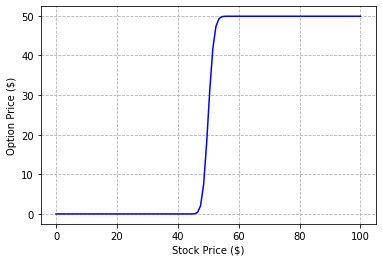

In [ ]:
# setting beta = 1

cash = DDMCashCall(50, S, K, r, sigma, T, 1)

plt.plot(S, cash, 'b')
plt.grid(linestyle='--')
plt.xlabel("Stock Price ($)")
plt.ylabel("Option Price ($)")

The Displaced Diffusion Model formula for a `digital asset-or-nothing call option` is given by

$ C(F,K,\sigma,T,\beta,r) = D(0,T) \left[ \left(\frac{F_0}{\beta}\right) \Phi(d_1) \right] $

$ D(0,T) = e^{-rT} $

$d_1 = \frac{\log \frac{F_0/\beta}{K+\frac{1-\beta}{\beta}F_0} + \left(\frac{1}{2}\beta^2\sigma^2\right)T}{\beta\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \beta\sigma\sqrt{T} $

Similarly, the DDM formula for a `digital asset-or-nothing put option` is given by

$P(F,K,\sigma,T,\beta, r) =  D(0,T) \left[\frac{F_0}{\beta} \Phi(-d_1) \right]$

In [ ]:
#DDM digital asset-or-nothing call and put options

def DDMAssetCall(F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((F/beta)*norm.cdf(d1_DDM))

def DDMAssetPut(F, K, r, sigma, T, beta):
    d1_DDM = (np.log((F/beta)/(K+((1-beta)/beta)*F))+((beta*sigma)**2/2)*T) / (beta*sigma*np.sqrt(T))
    d2_DDM = d1_DDM - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*((F/beta)*norm.cdf(-d1_DDM))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, 'Option Price ($)')

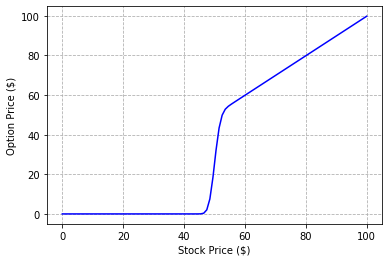

In [ ]:
# setting beta = 1

cash = DDMAssetCall(S, K, r, sigma, T, 1)

plt.plot(S, cash, 'b')
plt.grid(linestyle='--')
plt.xlabel("Stock Price ($)")
plt.ylabel("Option Price ($)")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


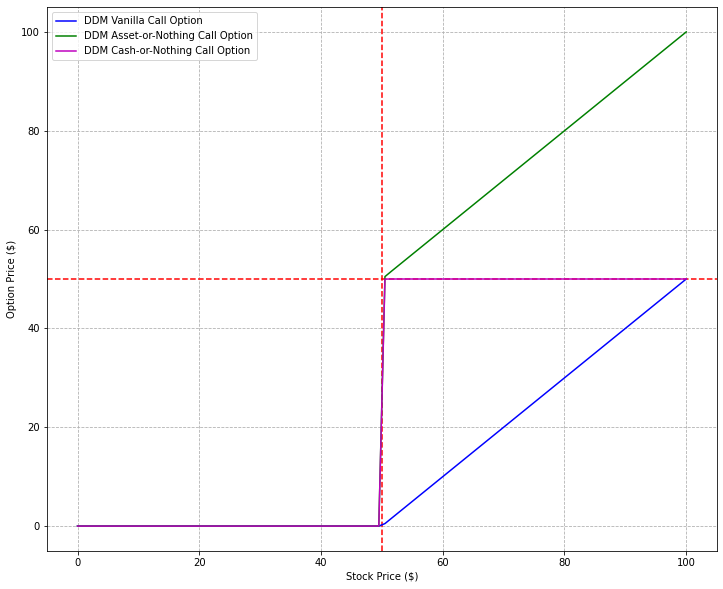

In [ ]:
plot_digital_vanilla("DDM", "Call", S, K, r, sigma, 0.01, beta=1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


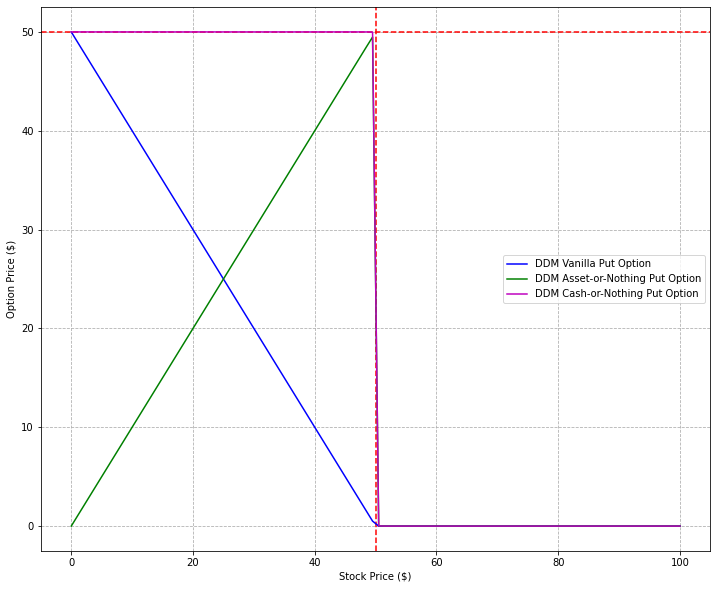

In [ ]:
plot_digital_vanilla("DDM", "Put", S, K, r, sigma, 0.01, beta=1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84dba4f4-47dd-4672-95f1-e2f4f6eed8bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>